In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
%matplotlib inline

# HIPPOCAMPUS
_______________________________________________________________________________________________


## ALL TEMPORAL 

In [2]:
cat_list = ['left temporal', 'bilateral temporal','right temporal']
df3 = pd.read_csv('data_09-11.csv')
df4 = df3.loc[df3['Type'].isin(cat_list)]

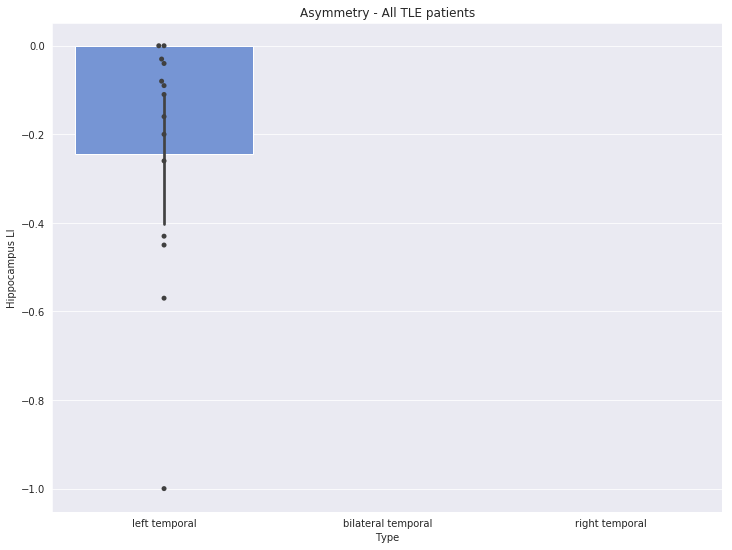

In [3]:
sns.set_style("darkgrid")
type_palette = sns.diverging_palette(255, 133, l=60, n=3, center="dark")
plt.figure(figsize=(12,9))
plt.title("Asymmetry - All TLE patients")
ax = sns.barplot(x='Type', y='Hippocampus LI', data=df4, order=cat_list, palette=type_palette)
ax = sns.swarmplot(x='Type', y='Hippocampus LI', data=df4, color=".25", order=cat_list)

In [4]:
print(len(df4))

14


## YES and MAYBE mTLE

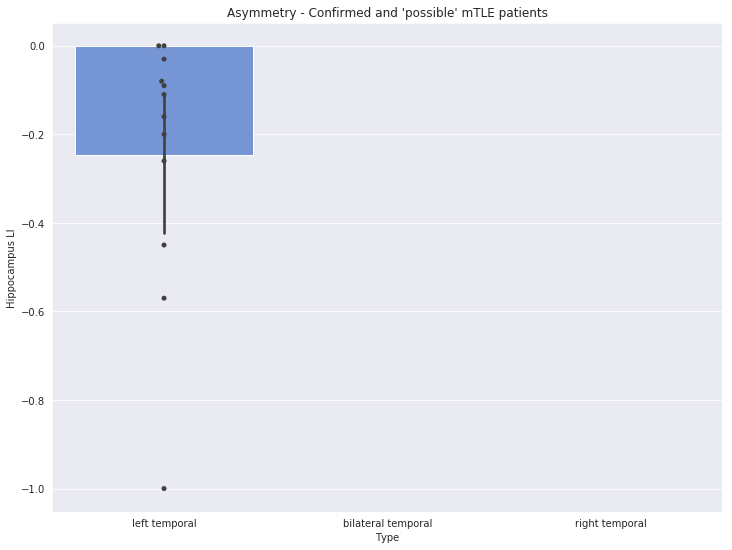

In [5]:
# Filter yes and maybe mTLE
mtl_list = ['Yes','Maybe']
df5 = df4.loc[df3['MTL'].isin(mtl_list)]


sns.set_style("darkgrid")
type_palette = sns.diverging_palette(255, 133, l=60, n=3, center="dark")
plt.figure(figsize=(12,9))
plt.title("Asymmetry - Confirmed and 'possible' mTLE patients")
ax = sns.barplot(x='Type', y='Hippocampus LI', data=df5, order=cat_list, palette=type_palette)
ax = sns.swarmplot(x='Type', y='Hippocampus LI', data=df5, color=".25", order=cat_list)

In [6]:
print(len(df5))

12


## YES mTLE 

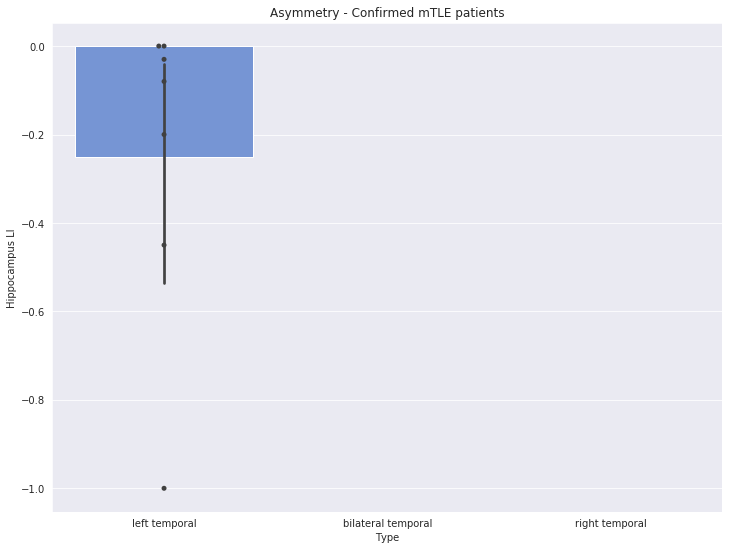

In [7]:
# Filter yes and maybe mTLE
mtl_list = ['Yes']
df6 = df4.loc[df3['MTL'].isin(mtl_list)]


sns.set_style("darkgrid")
type_palette = sns.diverging_palette(255, 133, l=60, n=3, center="dark")
plt.figure(figsize=(12,9))
plt.title("Asymmetry - Confirmed mTLE patients")
ax = sns.barplot(x='Type', y='Hippocampus LI', data=df6, order=cat_list, palette=type_palette)
ax = sns.swarmplot(x='Type', y='Hippocampus LI', data=df6, color=".25", order=cat_list)

In [8]:
print(len(df6))

7


In [9]:
# def create_plot(cat_list_list, roi_list):
#     palette = ['black']
#     clr_palette = sns.color_palette(palette)

#     fig, axes = plt.subplots(1,3, figsize=(9, 3), sharey=True)
#     fig.suptitle('{} and {} subject-wise comparison'.format(roi_list[0], roi_list[1]))
    
#     for catno in range(0, len(cat_list_list)):
#         cat_list = cat_list_list[catno]
#         df = df3.loc[df3['Type'].isin(cat_list)]
#         regions_df = df[roi_list]
#         data = pd.melt(regions_df)
#         data.to_csv('{}_test.csv'.format(cat_list[0]))
#         if cat_list[0] == 'left temporal':
#             pheno = 'Left TLE'
#         elif cat_list[0] == 'bilateral temporal':
#             pheno = 'Bilateral TLE'
#         elif cat_list[0] == 'right temporal':
#             pheno = 'Right TLE'
#         else:
#             pheno = 'unlabeled phenotype'

#         data2 = data.rename(columns={'variable': pheno, 'value': 'Laterality Index'})
#         #sns.swarmplot(data=data2, x=pheno,y='Laterality Index',ax=axes[catno], edgecolor='gray', palette=clr_palette)
#         sns.swarmplot(data=data, x='variable',y='value',ax=axes[catno], edgecolor='gray', palette=clr_palette)


#         idx0 = 0
#         idx1 = 1
#         locs1 = axes[catno].get_children()[idx0].get_offsets()
#         locs2 = axes[catno].get_children()[idx1].get_offsets()

#         for i in range(locs1.shape[0]):
#             x = [locs1[i, 0], locs2[i, 0]]
#             y = [locs1[i, 1], locs2[i, 1]]
#             axes[catno].plot(x, y, color='black', alpha=0.2)
            
#     return fig

In [10]:
def create_plot(cat_list_list, roi_list, bw):
    palette = ['black']
    clr_palette = sns.color_palette(palette)

    fig, axes = plt.subplots(1,3, figsize=(18, 6), sharey=True)
    if len(roi_list) == 2:
        fig.suptitle('{} and {} subject-wise comparison'.format(roi_list[0], roi_list[1]))
    if len(roi_list) == 3:
        fig.suptitle('{}, {}, and {} subject-wise comparison'.format(roi_list[0], roi_list[1], roi_list[2]))
        
    for catno in range(0, len(cat_list_list)):
        cat_list = cat_list_list[catno]
        df = df3.loc[df3['Type'].isin(cat_list)]
        regions_df = df[roi_list]# axes[0].plot(roi_list, )
        
        if cat_list[0] == 'left temporal':
            pheno = 'Left TLE'
        elif cat_list[0] == 'bilateral temporal':
            pheno = 'Bilateral TLE'
        elif cat_list[0] == 'right temporal':
            pheno = 'Right TLE'
        else:
            pheno = 'unlabeled phenotype'

        for index, row in regions_df.iterrows():
            row_list = list(row)
            position_list = list(np.linspace(len(row_list)/10,len(row_list)-.5, num=len(row_list),endpoint=False))
            if bw:
                axes[catno].plot(position_list,row_list, 'o-', color='gray', mfc='black',mec='black',lw=1, markersize=5)
            else:
                axes[catno].plot(position_list,row_list, 'o-', lw=1, markersize=5)
            axes[catno].set_xlabel(pheno)
            axes[catno].set_ylabel('Laterality Index')
            axes[catno].set_xlim([0.1,len(row_list)-1])
            axes[catno].set_ylim([-1.05,1.05])
            axes[catno].set_xticks(position_list)
            axes[catno].set_xticklabels(roi_list)

        axes[catno].hlines(y=0,xmin=0,xmax=len(position_list)-1, linestyle='dashed')
            
    return fig

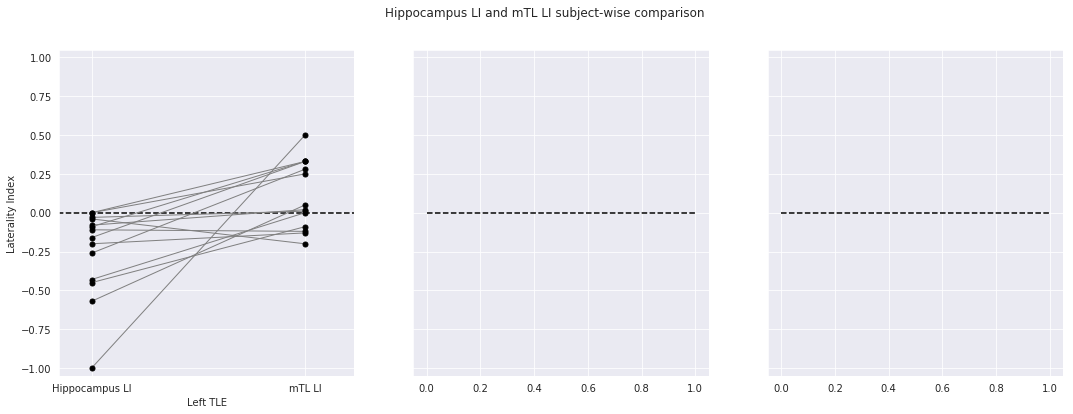

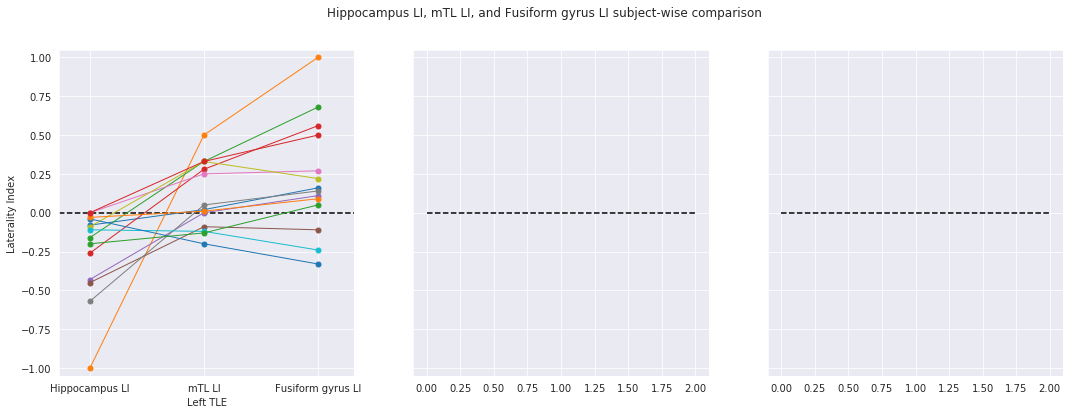

In [11]:
cat_list_list = [['left temporal'], ['bilateral temporal'], ['right temporal']]
roi_list1 = ['Hippocampus LI', 'mTL LI']
roi_list2 = ['Hippocampus LI', 'mTL LI', 'Fusiform gyrus LI']

plt1 = create_plot(cat_list_list, roi_list1, True)
plt1.savefig('plots/hippo_mTL_comp.png', bbox_inches='tight')
plt2 = create_plot(cat_list_list, roi_list2, False)
plt2.savefig('plots/hippo_mTL_ffg_comp.png', bbox_inches='tight')

In [12]:
df3[['subject','Type','Side','Hippocampus LI', 'mTL LI','Parahippocampal LI','Fusiform gyrus LI', 'Amygdala LI','MTL']]

,subject,Type,Side,Hippocampus LI,mTL LI,Parahippocampal LI,Fusiform gyrus LI,Amygdala LI,MTL
0,P026,left temporal,Left,-0.08,0.02,0.12,0.16,0.02,Yes
1,P027,left temporal,Left,-1.00,0.50,0.25,1.00,0.00,Yes
2,P028,left temporal,Left,-0.16,0.33,0.30,0.68,-1.00,Maybe
3,P038,left temporal,Left,-0.26,0.28,0.23,0.56,-0.11,Maybe
4,P041,left temporal,Left,-0.43,0.00,0.03,0.11,-1.00,NaN
5,P042,left temporal,Left,-0.45,-0.09,-0.10,-0.11,0.00,Yes
6,P057,left temporal,Left,0.00,0.25,0.08,0.27,0.00,Yes
7,P079,left temporal,Left,-0.57,0.05,-0.04,0.14,0.00,Maybe
8,P080,left temporal,Left,-0.09,0.33,0.54,0.22,0.00,Maybe
9,P082,left temporal,Left,-0.11,-0.12,0.03,-0.24,0.00,Maybe


In [13]:
# sns.set_style("whitegrid")
# plt.figure(figsize=(12,9))
# side_palette = sns.diverging_palette(255, 133, l=60, n=3, center="dark")
# ax = sns.barplot(x='Side', y='Hippocampus LI', data=df3, palette=side_palette)
# ax = sns.swarmplot(x='Side', y='Hippocampus LI', data=df3, color=".25")

# Medial Temporal Lobe
_______________________________________________________________________________________________


(-1, 1)

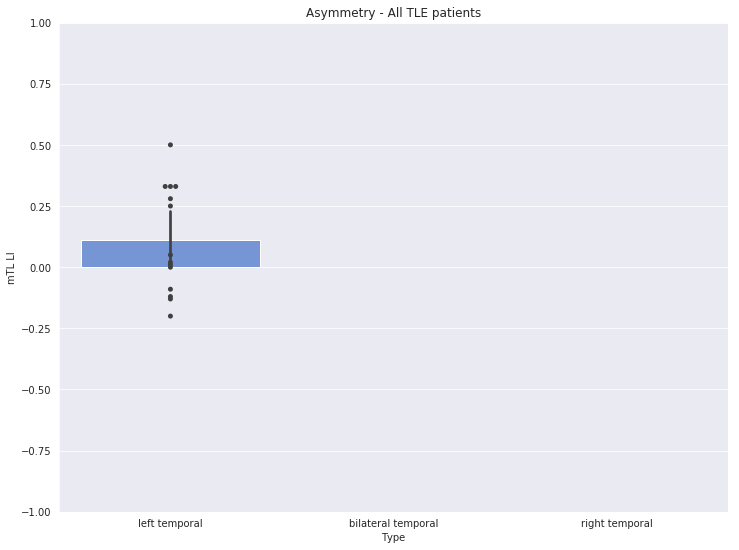

In [14]:
sns.set_style("darkgrid")
type_palette = sns.diverging_palette(255, 133, l=60, n=3, center="dark")
plt.figure(figsize=(12,9))
plt.title("Asymmetry - All TLE patients")
ax = sns.barplot(x='Type', y='mTL LI', data=df4, order=cat_list, palette=type_palette)
ax = sns.swarmplot(x='Type', y='mTL LI', data=df4, color=".25", order=cat_list)
ax.set_ylim(-1,1)

## YES and MAYBE mTLE

(-1, 1)

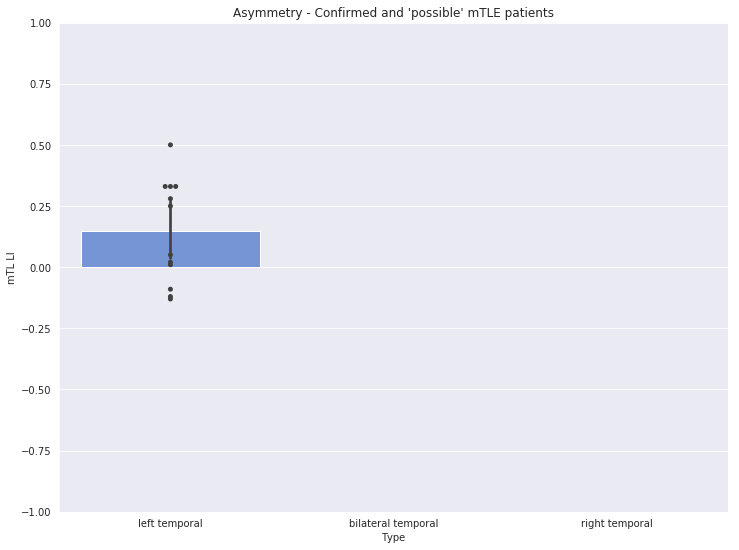

In [15]:
# Filter yes and maybe mTLE
sns.set_style("darkgrid")
type_palette = sns.diverging_palette(255, 133, l=60, n=3, center="dark")
plt.figure(figsize=(12,9))
plt.title("Asymmetry - Confirmed and 'possible' mTLE patients")
ax = sns.barplot(x='Type', y='mTL LI', data=df5, order=cat_list, palette=type_palette)
ax = sns.swarmplot(x='Type', y='mTL LI', data=df5, color=".25", order=cat_list)
ax.set_ylim(-1,1)

## YES and MAYBE mTLE

(-1, 1)

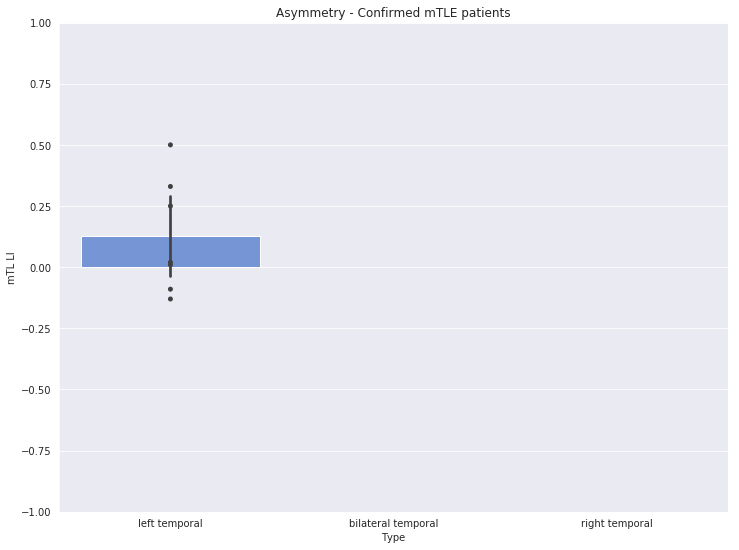

In [16]:
# Filter yes and maybe mTLE
sns.set_style("darkgrid")
type_palette = sns.diverging_palette(255, 133, l=60, n=3, center="dark")
plt.figure(figsize=(12,9))
plt.title("Asymmetry - Confirmed mTLE patients")
ax = sns.barplot(x='Type', y='mTL LI', data=df6, order=cat_list, palette=type_palette)
ax = sns.swarmplot(x='Type', y='mTL LI', data=df6, color=".25", order=cat_list)
ax.set_ylim(-1,1)

In [17]:
df6[['subject','Type','Side','Hippocampus LI', 'mTL LI','MTL']]

,subject,Type,Side,Hippocampus LI,mTL LI,MTL
0,P026,left temporal,Left,-0.08,0.02,Yes
1,P027,left temporal,Left,-1.00,0.50,Yes
5,P042,left temporal,Left,-0.45,-0.09,Yes
6,P057,left temporal,Left,0.00,0.25,Yes
11,P093,left temporal,Left,-0.03,0.01,Yes
12,P094,left temporal,Left,-0.20,-0.13,Yes
13,P096,left temporal,Left,0.00,0.33,Yes


In [18]:
def create_plot(cat_list_list, roi_list, bw):
    palette = ['black']
    clr_palette = sns.color_palette(palette)

    fig, axes = plt.subplots(1,3, figsize=(18, 6), sharey=True)
    if len(roi_list) == 2:
        fig.suptitle('{} and {} subject-wise comparison'.format(roi_list[0], roi_list[1]))
    if len(roi_list) == 3:
        fig.suptitle('{}, {}, and {} subject-wise comparison'.format(roi_list[0], roi_list[1], roi_list[2]))
        
    for catno in range(0, len(cat_list_list)):
        cat_list = cat_list_list[catno]
        df = df3.loc[df3['Type'].isin(cat_list)]
        regions_df = df[roi_list]# axes[0].plot(roi_list, )
        
        if cat_list[0] == 'left temporal':
            pheno = 'Left TLE'
        elif cat_list[0] == 'bilateral temporal':
            pheno = 'Bilateral TLE'
        elif cat_list[0] == 'right temporal':
            pheno = 'Right TLE'
        else:
            pheno = 'unlabeled phenotype'

        for index, row in regions_df.iterrows():
            row_list = list(row)
            position_list = list(np.linspace(len(row_list)/10,len(row_list)-.5, num=len(row_list),endpoint=False))
            if bw:
                axes[catno].plot(position_list,row_list, 'o-', color='gray', mfc='black',mec='black',lw=1, markersize=5)
            else:
                axes[catno].plot(position_list,row_list, 'o-', lw=1, markersize=5)
            axes[catno].set_xlabel(pheno)
            axes[catno].set_ylabel('Laterality Index')
            axes[catno].set_xlim([0.1,len(row_list)-1])
            axes[catno].set_ylim([-1.05,1.05])
            axes[catno].set_xticks(position_list)
            axes[catno].set_xticklabels(roi_list)

        axes[catno].hlines(y=0,xmin=0,xmax=len(position_list)-1, linestyle='dashed')
            
    return fig